In [1]:
from feature_engine import FeatureEngine
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_auc_score
import shap

/Users/nikhilnarayanan/Desktop/FYP/REPLACE-BG/my-python3-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = FeatureEngine()

In [5]:
dataset.training_set.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,index,id,06:00:00,06:05:00,06:10:00,06:15:00,06:20:00,...,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2014,Year_2015,Year_2016
0,0,0,0,0,2,163.0,159.0,155.0,152.0,147.0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1,1,2,214.0,215.0,221.0,231.0,241.0,...,0,0,0,0,0,0,0,0,1,0
2,2,2,2,2,2,115.0,114.0,116.0,118.0,121.0,...,0,0,0,0,0,0,0,0,1,0
3,3,3,3,3,2,206.0,207.0,207.0,209.0,211.0,...,0,0,0,0,0,0,0,0,1,0
4,4,4,4,4,2,169.0,171.0,173.0,173.0,174.0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
training_X = dataset.training_set.iloc[:,222:]
validation_X = dataset.validation_set.iloc[:,220:]
training_Y = dataset.training_set.iloc[:, 221]
validation_Y = dataset.validation_set.iloc[:, 219]

In [7]:
validation_X['Year_2014'] = 0
#validation_X.drop(columns=['Year_2013'], inplace=True)
cols = np.array(training_X.columns)
validation_X = validation_X[cols]

In [119]:
print(roc_auc_score_result)

0.4989849449281685


In [8]:
bst = XGBClassifier(objective="binary:logistic", eval_metric="auc")
bst.fit(training_X, training_Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [9]:
preds = bst.predict(training_X)
roc_auc_score(training_Y, preds)

0.5921066616831626

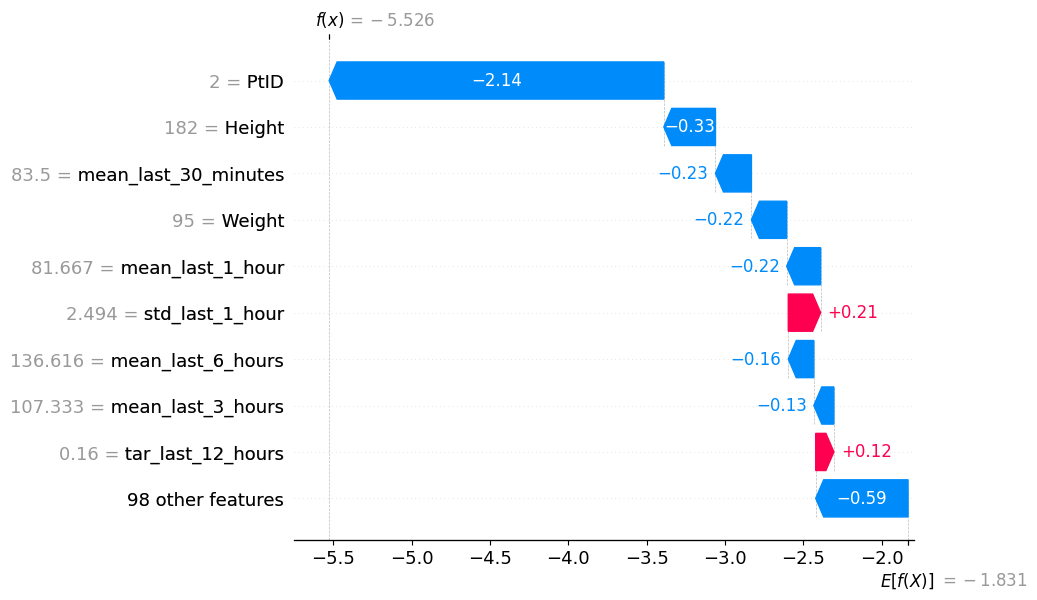

In [10]:
explainer = shap.Explainer(bst)
shap_values = explainer(training_X)
shap.plots.waterfall(shap_values[0])

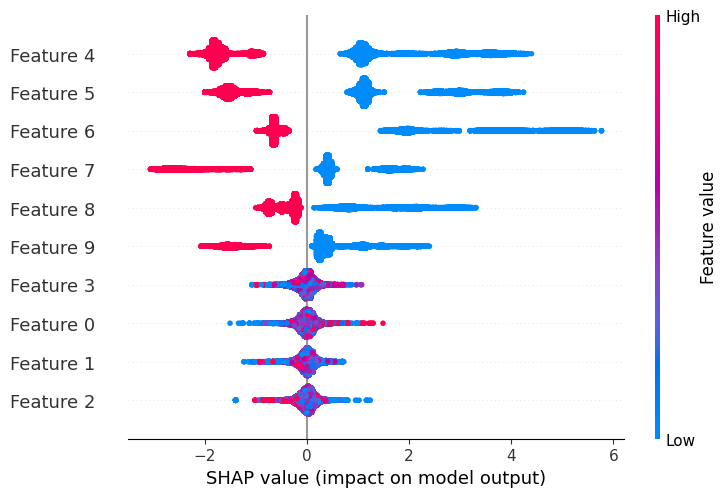

In [22]:
shap.plots.beeswarm(shap_values)

In [23]:
selector_2 = SequentialFeatureSelector(XGBClassifier(objective="binary:logistic", eval_metric="auc") ,n_features_to_select=30, direction='forward', scoring="roc_auc", cv=10)

selector_2.fit_transform(x_train,y_train)

array([[ 1.        , 42.2765126 , -0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        , 56.21641648, -0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        , 72.22624379, -0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.        , 25.81213638,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        , 57.23443733,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        , 42.2765126 ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [25]:
x_train_transfor = selector_2.transform(training_X)

In [45]:
bst.fit(x_train_transfor, training_Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
preds = bst.predict(x_train_transfor)
roc_auc_score(training_Y, preds)

0.5199169364114614